<a href="https://colab.research.google.com/github/MuhtasimMahadi/Muhtasim_Hossain/blob/main/1st_phase_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training, testing, and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the target size of your images
img_size = (224, 224)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/train',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test',
    target_size=img_size,
    batch_size=32,
    shuffle=False,  # Set shuffle to False if you want to evaluate predictions in order
    class_mode='categorical'
)


Found 7452 images belonging to 3 classes.
Found 1068 images belonging to 3 classes.
Found 2130 images belonging to 3 classes.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [10]:
from tensorflow.keras.preprocessing import image

# Custom contrast stretching function
def contrast_stretching(img):
    # Define the minimum and maximum pixel values after contrast stretching
    min_val, max_val = 0, 255

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Calculate the minimum and maximum pixel values of the image
    img_min = np.min(img_array)
    img_max = np.max(img_array)

    # Perform contrast stretching
    img_array = (img_array - img_min) / (img_max - img_min) * (max_val - min_val) + min_val

    # Clip pixel values to the valid range [0, 255]
    img_array = np.clip(img_array, 0, 255)

    # Convert the array back to an image
    stretched_img = image.array_to_img(img_array)

    return stretched_img

# Update the ImageDataGenerator with the custom contrast stretching function
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=contrast_stretching
)

validation_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=contrast_stretching)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=contrast_stretching)


Found 7452 images belonging to 3 classes.
Found 1068 images belonging to 3 classes.
Found 2130 images belonging to 3 classes.


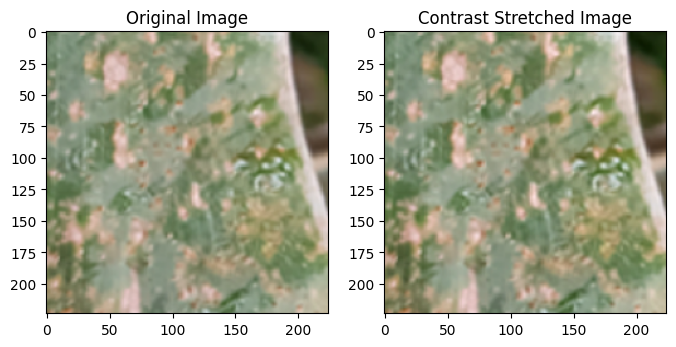

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import numpy as np
import matplotlib.pyplot as plt

# Custom contrast stretching function
def contrast_stretching(img):
    # Define the minimum and maximum pixel values after contrast stretching
    min_val, max_val = 0, 255

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Calculate the minimum and maximum pixel values of the image
    img_min = np.min(img_array)
    img_max = np.max(img_array)

    # Perform contrast stretching
    img_array = (img_array - img_min) / (img_max - img_min) * (max_val - min_val) + min_val

    # Clip pixel values to the valid range [0, 255]
    img_array = np.clip(img_array, 0, 255)

    # Convert the array back to an image
    stretched_img = array_to_img(img_array)

    return stretched_img

# Specify the target size of your images
img_size = (224, 224)

# Directory path to your dataset
train_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/train'
validation_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val'
test_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test'

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=contrast_stretching
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=contrast_stretching
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=contrast_stretching
)

# Create data generators from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

# Plot a sample image before and after contrast stretching
sample_img_path = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test/Common_rust/common_rust_original_IMG_20230429_174905.png_116512d8-088d-408c-ba5e-d5638dbf4c44.png'  # Replace with the path to a sample image in your dataset
sample_img = load_img(sample_img_path, target_size=img_size)

# Apply contrast stretching and plot the images
stretched_sample_img = contrast_stretching(sample_img)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_to_array(sample_img)/255.0)  # Display the original image

plt.subplot(1, 2, 2)
plt.title('Contrast Stretched Image')
plt.imshow(img_to_array(stretched_sample_img)/255.0)  # Display the stretched image

plt.show()


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [29]:
# Custom contrast stretching function
def contrast_stretching(img):
    min_val, max_val = 0, 1  # Update min_val and max_val to be in the [0, 1] range
    img_array = img_to_array(img) / 255.0  # Normalize to the [0, 1] range
    img_min = np.min(img_array)
    img_max = np.max(img_array)
    img_array = (img_array - img_min) / (img_max - img_min) * (max_val - min_val) + min_val
    img_array = np.clip(img_array, 0, 1)  # Clip values to the valid range [0, 1]
    stretched_img = array_to_img(img_array * 255.0)
    return stretched_img

# Custom histogram equalization function
# Custom histogram equalization function
def histogram_equalization(img_batch):
    img_array_batch = np.array(img_batch) / 255.0  # Normalize to [0, 1]

    equalized_img_batch = []
    for img_array in img_array_batch:
        equalized_img_array = exposure.equalize_hist(img_array)  # Apply equalization to all channels
        equalized_img_array = (equalized_img_array * 255).astype(np.uint8)
        equalized_img_batch.append(equalized_img_array)

    return np.array(equalized_img_batch)


# Custom histogram specification function
def histogram_specification(img, reference_image):
    img_array = img_to_array(img).astype(np.uint8)
    reference_array = img_to_array(reference_image).astype(np.uint8)

    matched_img_array = exposure.match_histograms(img_array, reference_array)
    matched_img_array = (matched_img_array * 255).astype(np.uint8)

    matched_img = array_to_img(matched_img_array)

    return matched_img



# Custom gamma correction function
def gamma_correction(img, gamma=1.0):
    img_array = img_to_array(img).astype(np.uint8)
    corrected_img = exposure.adjust_gamma(img_array, gamma)
    corrected_img = (corrected_img * 255).astype(np.uint8)
    corrected_img = array_to_img(corrected_img)
    return corrected_img

# Specify the target size of your images
img_size = (224, 224)

# Directory path to your dataset
train_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/train'
validation_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val'
test_dir = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test'

# Create data generators
train_datagen_contrast = ImageDataGenerator(
    rescale=None,  # Disable the default rescale
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=contrast_stretching
)

# Create data generators
train_datagen_equalization = ImageDataGenerator(
    rescale=None,  # Disable the default rescale
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=histogram_equalization
)

train_datagen_specification = ImageDataGenerator(
    rescale=1./255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=lambda img: histogram_specification(img, reference_image)
)

train_datagen_correction = ImageDataGenerator(
    rescale=1./255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=lambda img: gamma_correction(img, gamma=1.5)
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators from directories
train_generator_contrast = train_datagen_contrast.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

train_generator_equalization = train_datagen_equalization.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

reference_image_path = '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val/Common_rust/common_rust_original_IMG_20230429_174905.png_1a0c3887-693c-4b88-ad7c-3ea469b30659.png'
reference_image = img_to_array(load_img(reference_image_path, target_size=img_size))

train_generator_specification = train_datagen_specification.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

train_generator_correction = train_datagen_correction.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

# Note: You can create separate generators for validation and test datasets in a similar manner

# Example: Plot an image from each generator
sample_img_contrast = contrast_stretching(next(train_generator_contrast)[0][0])
sample_img_equalization = histogram_equalization(next(train_generator_equalization)[0])

ssample_img_specification = histogram_specification(next(train_generator_specification)[0])

sample_img_correction = gamma_correction(next(train_generator_correction)[0][0])

plt.figure(figsize=(12, 4))


plt.subplot(1, 4, 1)
plt.title('Contrast Stretching')
plt.imshow(img_to_array(sample_img_contrast) / 255.0)

plt.subplot(1, 4, 2)
plt.title('Histogram Equalization')
plt.imshow(img_to_array(sample_img_equalization[0]) / 255.0)  # Access the first image in the batch


plt.subplot(1, 4, 3)
plt.title('Histogram Specification')
plt.imshow(sample_img_specification)

plt.subplot(1, 4, 4)
plt.title('Gamma Correction')
plt.imshow(sample_img_correction)

plt.show()


Found 7452 images belonging to 3 classes.
Found 7452 images belonging to 3 classes.
Found 7452 images belonging to 3 classes.
Found 7452 images belonging to 3 classes.


TypeError: ignored

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    contrast_stretched_image = (image - min_val) / (max_val - min_val) * 255
    return contrast_stretched_image.astype(np.uint8)

def histogram_equalization(image):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    cdf = np.cumsum(histogram)
    cdf_normalized = cdf / cdf.max()
    equalized_image = cv2.LUT(image, cdf_normalized)
    return equalized_image.astype(np.uint8)

def histogram_specification(image, target_histogram):
    equalized_image = cv2.matchTemplate(image, target_histogram, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(equalized_image)
    equalized_image = (equalized_image - min_val) / (max_val - min_val) * 255
    return equalized_image.astype(np.uint8)

def gamma_correction(image, gamma):
    corrected_image = np.power(image / 255, gamma) * 255
    return corrected_image.astype(np.uint8)

# Load the dataset
train_images = np.load('/content/drive/MyDrive/titl_defence/Dataset/split_dataset/train')
test_images = np.load('/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test')
val_images = np.load('/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val')


# Apply contrast stretching
contrast_stretched_train_images = np.apply_along_axis(contrast_stretching, 2, train_images)
contrast_stretched_test_images = np.apply_along_axis(contrast_stretching, 2, test_images)
contrast_stretched_val_images = np.apply_along_axis(contrast_stretching, 2, val_images)

# Apply histogram equalization
equalized_train_images = np.apply_along_axis(histogram_equalization, 2, train_images)
equalized_test_images = np.apply_along_axis(histogram_equalization, 2, test_images)
equalized_val_images = np.apply_along_axis(histogram_equalization, 2, val_images)

# Apply histogram specification
target_histogram = cv2.calcHist([equalized_train_images[0]], [0], None, [256], [0, 256])
specified_train_images = np.apply_along_axis(histogram_specification, 2, train_images, target_histogram)
specified_test_images = np.apply_along_axis(histogram_specification, 2, test_images, target_histogram)
specified_val_images = np.apply_along_axis(histogram_specification, 2, val_images, target_histogram)

# Apply gamma correction
gamma = 1.5
gamma_corrected_train_images = np.apply_along_axis(gamma_correction, 2, train_images, gamma)
gamma_corrected_test_images = np.apply_along_axis(gamma_correction, 2, test_images, gamma)
gamma_corrected_val_images = np.apply_along_axis(gamma_correction, 2, val_images, gamma)

# Plot sample images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 6, 1)
plt.imshow(train_images[0])
plt.title('Original')
plt.axis('off')

# Contrast stretched image
plt.subplot(1, 6, 2)
plt.imshow(contrast_stretched_train_images[0])


IsADirectoryError: ignored